In [17]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-0824ccb6-3433-c0b4-e079-4b14aa79fc29)


In [18]:
#!unzip ./drive/MyDrive/single-person-pose-estimation/dataset/tfrecords.zip

In [1]:
import sys
import time
from datetime import datetime, timedelta
sys.path.append('/content/drive/MyDrive/single-person-pose-estimation')
from configs import default_config as cfg



---



---
Dataset


In [2]:
from dataset_builder import DatasetBuilder

In [3]:
ds_builder = DatasetBuilder(cfg)

Train dataset with 149813 examples.
Valid dataset with 6352 examples.




---



---
Model


In [4]:
from model.hourglass import HourGlassNet

In [5]:
HG = HourGlassNet(cfg.NUM_KEYPOINTS, cfg.HG_NUM_STACKS, cfg.HG_NUM_FILTERS, 
              (cfg.IMAGE_HEIGHT, cfg.IMAGE_WIDTH, 3), 
              (cfg.LABEL_HEIGHT, cfg.LABEL_WIDTH, cfg.NUM_KEYPOINTS))
model = HG.create_hg_model()

Created HourGlassmodel:
    1. 4 stacks.
    2. 12080324 parameters. Call object.get_summary() for more detail.
    




---



---
TRAINER


In [6]:
from trainer import Trainer



---
Initial train (run once at the start)


In [7]:
trainer = Trainer(model, ds_builder, epochs = 20, learning_rate = 0.01, config = cfg)

In [26]:
trainer.train()

Start traing with:
    1. Current date 22-03-2022.
    2. Number of epochs 20.
    3. Learning rate 0.01.
    4. Batch size 16.
    

Learning rate for epoch 1 is 0.009999999776482582
Epoch 1/20
9363/9363 [==============================] - ETA: 0s - loss: 0.0037 - heatmap1_loss: 9.3862e-04 - heatmap2_loss: 9.1515e-04 - heatmap3_loss: 9.1282e-04 - heatmap4_loss: 9.0787e-04
Epoch 1: val_loss improved from inf to 0.00328, saving model to temp/checkpoints/22-03-2022-E20.cpkt
9363/9363 [==============================] - 2736s 290ms/step - loss: 0.0037 - heatmap1_loss: 9.3862e-04 - heatmap2_loss: 9.1515e-04 - heatmap3_loss: 9.1282e-04 - heatmap4_loss: 9.0787e-04 - val_loss: 0.0033 - val_heatmap1_loss: 8.5112e-04 - val_heatmap2_loss: 8.1913e-04 - val_heatmap3_loss: 8.0720e-04 - val_heatmap4_loss: 8.0431e-04

Learning rate for epoch 2 is 0.009999999776482582
Epoch 2/20
9363/9363 [==============================] - ETA: 0s - loss: 0.0031 - heatmap1_loss: 8.0393e-04 - heatmap2_loss: 7.6817e-04 - 

In [27]:
# to drive
!cp -r ./temp ./drive/MyDrive/single-person-pose-estimation



---
Resume train 1, half the learning rate 0.01/2 = 0.005


In [ ]:
# from drive
!cp -r ./drive/MyDrive/single-person-pose-estimation/temp ./

In [ ]:
trainer = Trainer(model, ds_builder, epochs = 20, learning_rate = 0.005, config = cfg)

In [ ]:
trainer.resume_training()

In [ ]:
# to drive
!cp -r ./temp ./drive/MyDrive/single-person-pose-estimation




---


---


Test prediction

Should reset runtime


In [16]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [8]:
loaded_model = trainer.get_best_weights_model()

Loading best weights from temp/checkpoints


In [10]:
ds = ds_builder.get_ds_prediction().take(5)

In [12]:
pred1, pred2, pred3, pred4 = loaded_model.predict(ds)

In [13]:
it = iter(ds)

In [19]:
images_batch, heatmaps_batch = next(it)

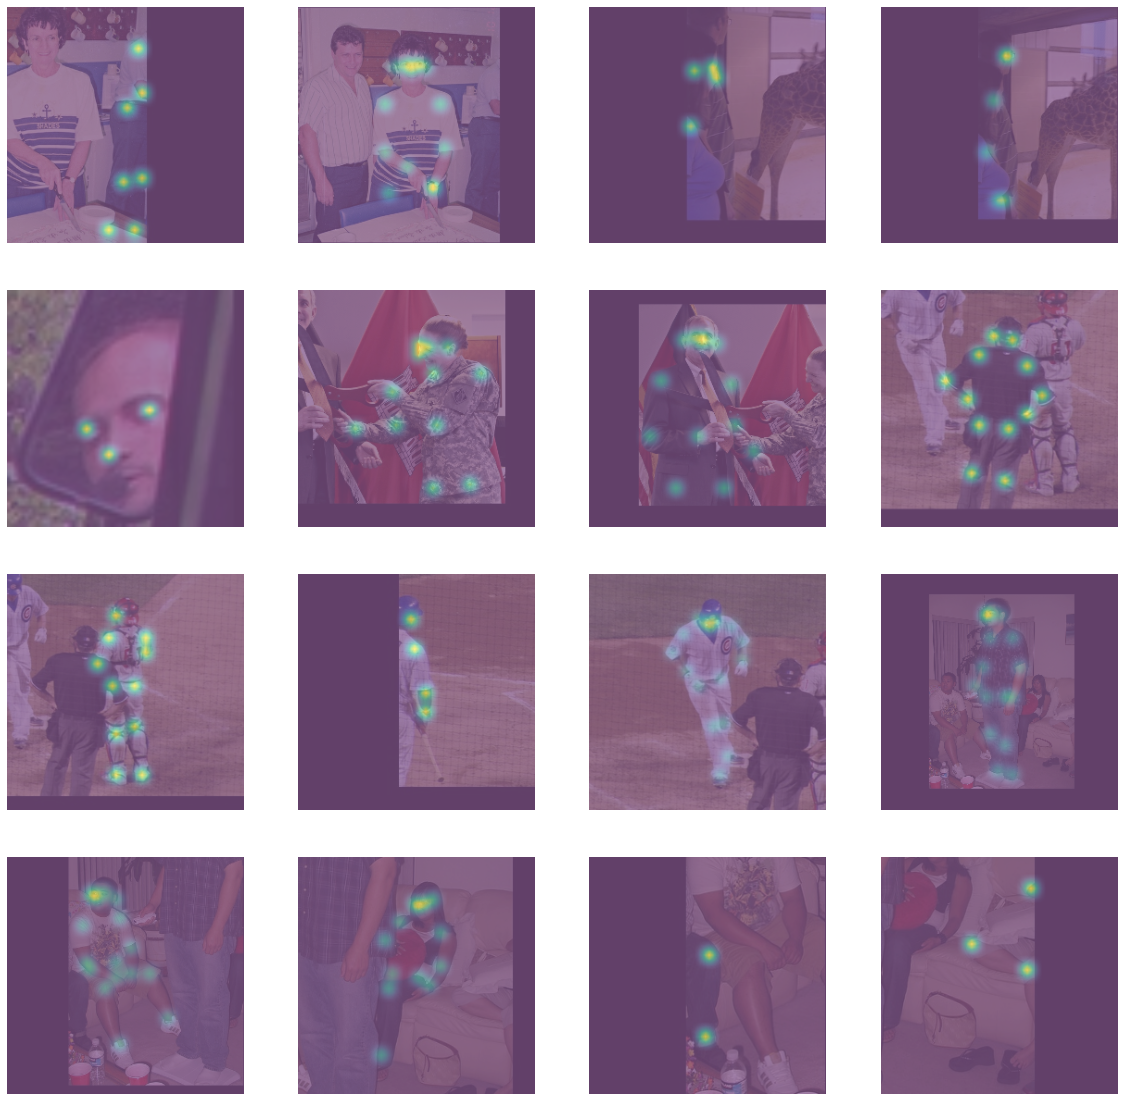

In [20]:
#Truth ground
plt.figure(figsize=(20,20))
for i in range(16):
    ax = plt.subplot(16/4, 16/4, i + 1)
    plt.imshow(images_batch[i], cmap = 'gray', alpha = 0.5)
    h = tf.image.resize(heatmaps_batch[i], (256, 256))
    plt.imshow(tf.reduce_sum(h, axis = -1), alpha = 0.5)
    plt.axis("off")

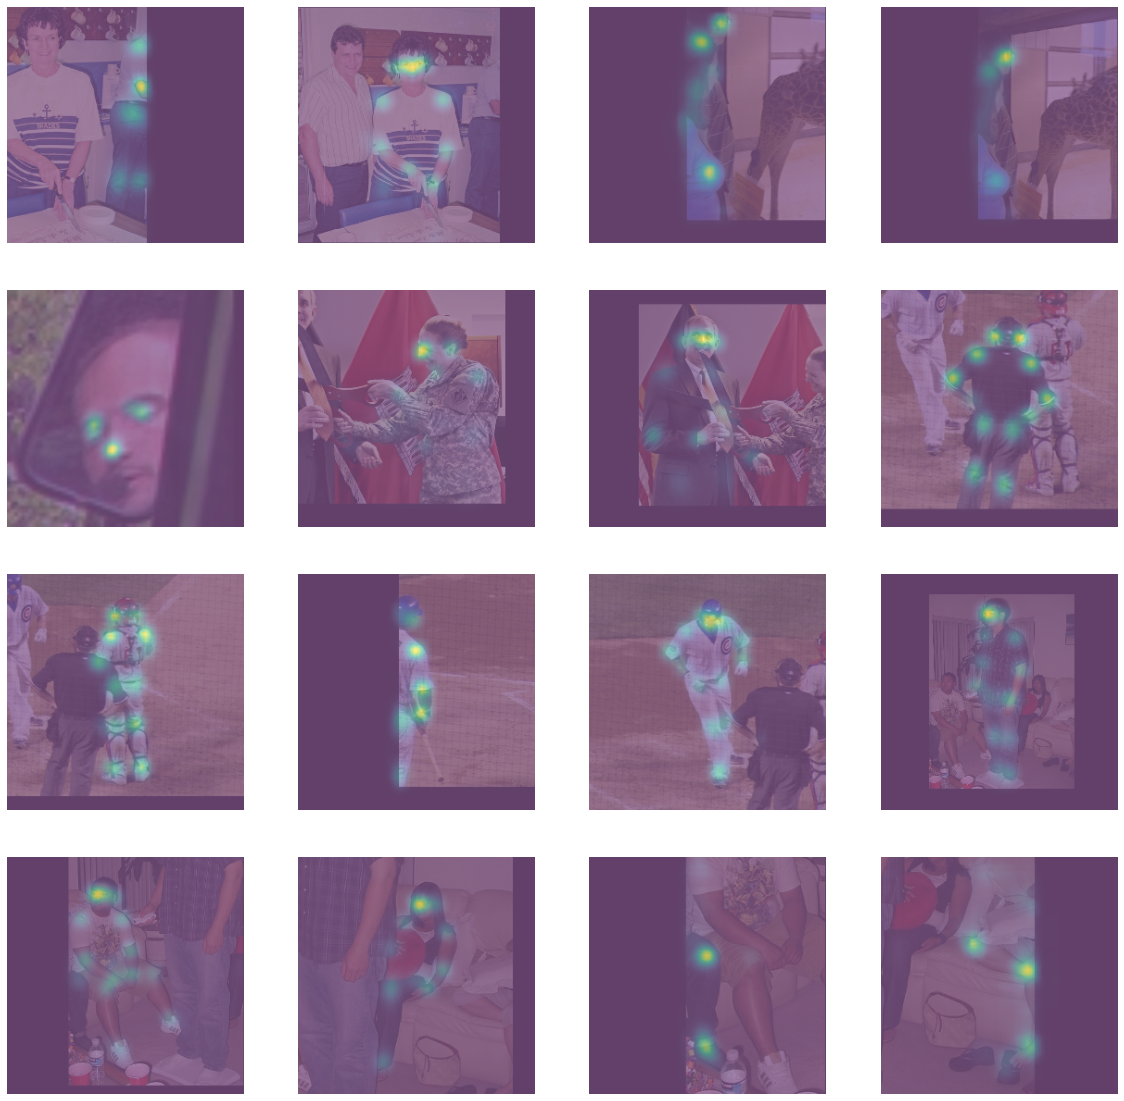

In [23]:
#RME loss
plt.figure(figsize=(20,20))
for i in range(16):
    ax = plt.subplot(16/4, 16/4, i + 1)
    plt.imshow(images_batch[i], cmap = 'gray', alpha = 0.5)
    p = tf.image.resize(pred4[16 + i], (256,256))
    plt.imshow(tf.reduce_sum(p, axis = -1), alpha = 0.5)
    plt.axis("off")